In [1]:
from pycaret.datasets import get_data
data = get_data('insurance')

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


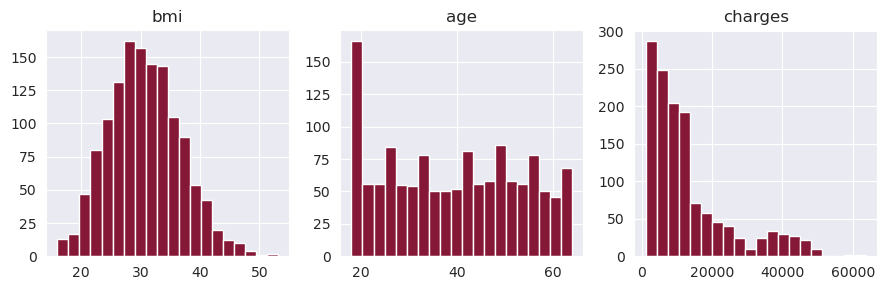

In [5]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import sys

from pycaret.datasets import get_data

data = get_data('insurance')

sns.set_style('darkgrid')
colors = ['#851836', '#EDBD17', '#0E1428', '#407076', '#4C5B61']
sns.set_palette(sns.color_palette(colors))

numerical = ['bmi', 'age', 'charges']
data[numerical].hist(bins=20, layout=(1, 3), figsize=(9,3))

plt.tight_layout()

plt.show()

Este código primero configura el experimento con setup(), donde:

data es el DataFrame que contiene los datos.
target es la columna objetivo que queremos predecir.
train_size es la proporción de datos que se utilizarán para el entrenamiento. El resto se utilizará para la validación.
normalize es un booleano que indica si los predictores deben ser normalizados.
transformation es un booleano que indica si se debe aplicar una transformación de potencia de Yeo-Johnson a las variables para hacerlas más gaussianas.
transform_target es un booleano que indica si se debe aplicar una transformación de potencia de Box-Cox a la variable objetivo.
remove_outliers es un booleano que indica si se deben eliminar los valores atípicos de los datos.
combine_rare_levels es un booleano que indica si se deben combinar los niveles raros en todas las variables categóricas.
remove_multicollinearity es un booleano que indica si se deben eliminar las variables multicolineales.
session_id es la semilla para la reproducibilidad del experimento.
Luego, crea el modelo de regresión lineal con create_model(), entrena el modelo con tune_model() y finalmente hace predicciones con predict_model().

In [10]:
# Importar las bibliotecas necesarias
import pandas as pd
from pycaret.regression import *

# Configurar el experimento
exp_reg = setup(data = data, 
                target = 'charges', 
                train_size = 0.7, 

                session_id=123)

# Crear el modelo de regresión lineal
lr = create_model('lr')

# Entrenar el modelo
lr = tune_model(lr)

# Hacer predicciones
predictionsLR = predict_model(lr, data=data)

# Crear el modelo de regresión Lasso (L1)
lasso = create_model('lasso')

# Entrenar el modelo
lasso = tune_model(lasso)

# Hacer predicciones
predictionsLasso = predict_model(lasso, data=data)

# Crear el modelo de regresión Ridge (L2)
ridge = create_model('ridge')

# Entrenar el modelo
ridge = tune_model(ridge)

# Hacer predicciones
predictionsRidge = predict_model(ridge, data=data)


,Description,Value
0,Session id,123
1,Target,charges
2,Target type,Regression
3,Original data shape,"(1338, 7)"
4,Transformed data shape,"(1338, 10)"
5,Transformed train set shape,"(936, 10)"
6,Transformed test set shape,"(402, 10)"
7,Ordinal features,2
8,Numeric features,3
9,Categorical features,3


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,4222.9616,33775764.3432,5811.6920,0.7983,0.4879,0.4328
1,4522.5819,43620030.5192,6604.5462,0.7464,0.5473,0.4216
2,3853.0378,31981107.9602,5655.1842,0.5951,0.7108,0.4398
3,3707.7705,26513348.5760,5149.1114,0.7786,0.4891,0.5164
4,4484.2122,43828444.1000,6620.3054,0.6740,0.5761,0.3847
5,4113.6222,35882341.9810,5990.1871,0.7692,0.5464,0.4130
6,4098.0868,39631320.0598,6295.3411,0.7303,0.5745,0.4266
7,4833.7747,45739275.7172,6763.0818,0.7485,0.5887,0.3967
8,4621.0616,40681916.3737,6378.2377,0.7372,0.7032,0.5225


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,4222.9616,33775764.3432,5811.6920,0.7983,0.4879,0.4328
1,4522.5819,43620030.5192,6604.5462,0.7464,0.5473,0.4216
2,3853.0378,31981107.9602,5655.1842,0.5951,0.7108,0.4398
3,3707.7705,26513348.5760,5149.1114,0.7786,0.4891,0.5164
4,4484.2122,43828444.1000,6620.3054,0.6740,0.5761,0.3847
5,4113.6222,35882341.9810,5990.1871,0.7692,0.5464,0.4130
6,4098.0868,39631320.0598,6295.3411,0.7303,0.5745,0.4266
7,4833.7747,45739275.7172,6763.0818,0.7485,0.5887,0.3967
8,4621.0616,40681916.3737,6378.2377,0.7372,0.7032,0.5225


Fitting 10 folds for each of 2 candidates, totalling 20 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Linear Regression,4241.7876,36545028.0697,6045.2484,0.7506,0.5947,0.4400


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,4223.3758,33778903.4319,5811.9621,0.7982,0.4873,0.4328
1,4523.3938,43628950.6246,6605.2215,0.7463,0.5472,0.4217
2,3852.3731,31964606.8423,5653.7250,0.5953,0.7093,0.4399
3,3708.1356,26511385.1674,5148.9208,0.7786,0.4892,0.5165
4,4484.8707,43827109.6323,6620.2047,0.6740,0.5758,0.3847
5,4113.9686,35889538.9891,5990.7878,0.7691,0.5456,0.4129
6,4098.6045,39633356.3659,6295.5029,0.7303,0.5762,0.4268
7,4834.1138,45732626.4950,6762.5902,0.7485,0.5881,0.3968
8,4621.4620,40690114.1374,6378.8803,0.7372,0.7019,0.5227


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,4210.2675,34071411.3772,5837.0722,0.7965,0.4694,0.4282
1,4509.0140,43728927.3231,6612.7851,0.7457,0.5275,0.4138
2,3808.4921,31544220.6891,5616.4242,0.6006,0.7432,0.4340
3,3675.9095,26432795.1279,5141.2834,0.7793,0.4811,0.5065
4,4467.4924,43684536.6866,6609.4279,0.6751,0.5378,0.3847
5,4083.4188,35943987.7025,5995.3305,0.7688,0.4772,0.3966
6,4102.2892,39940967.5107,6319.8867,0.7282,0.6869,0.4232
7,4829.0710,45895334.1751,6774.6095,0.7476,0.5324,0.3933
8,4604.8017,40777882.9545,6385.7563,0.7366,0.5777,0.5200


Fitting 10 folds for each of 10 candidates, totalling 100 fits


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Lasso Regression,4220.7272,36567177.2827,6047.0801,0.7505,0.5560,0.4337


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,4239.3907,33822460.1766,5815.7081,0.7980,0.4866,0.4355
1,4545.7085,43746244.9484,6614.0944,0.7456,0.5459,0.4241
2,3857.7442,31801635.7531,5639.2939,0.5974,0.6866,0.4425
3,3724.3186,26549509.7665,5152.6216,0.7783,0.4904,0.5199
4,4498.0735,43805615.0489,6618.5810,0.6742,0.5709,0.3877
5,4130.1239,36010889.6566,6000.9074,0.7684,0.5375,0.4141
6,4111.2505,39626704.4609,6294.9745,0.7304,0.5680,0.4294
7,4845.1013,45700173.2049,6760.1903,0.7487,0.5760,0.3986
8,4637.6992,40746155.0826,6383.2715,0.7368,0.6716,0.5265


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,4231.8639,33799712.3372,5813.7520,0.7981,0.4872,0.4342
1,4535.1131,43687226.0086,6609.6313,0.7460,0.5466,0.4230
2,3855.5865,31882940.9554,5646.4981,0.5963,0.6962,0.4413
3,3716.6415,26531817.0460,5150.9045,0.7785,0.4898,0.5182
4,4491.5541,43814870.5839,6619.2802,0.6741,0.5732,0.3862
5,4122.4444,35950723.5092,5995.8922,0.7687,0.5414,0.4136
6,4105.2203,39627589.9226,6295.0449,0.7304,0.5704,0.4281
7,4839.9132,45716292.0914,6761.3824,0.7486,0.5813,0.3977
8,4629.9498,40715274.6322,6380.8522,0.7370,0.6837,0.5246


Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Ridge Regression,4254.5959,36555315.4178,6046.0992,0.7505,0.5862,0.4423


Este código extrae los resultados de cada modelo utilizando la función pull() y luego los imprime. Los resultados incluyen varias métricas de rendimiento del modelo, como el error cuadrático medio (MSE), el error absoluto medio (MAE), el coeficiente de determinación (R^2), entre otros.

In [ ]:
# Extraer los resultados de los modelos
lr_results = pull(lr)
lasso_results = pull(lasso)
ridge_results = pull(ridge)

# Comparar los resultados
print("Resultados de la regresión lineal:\n", lr_results)
print("\nResultados de la regresión Lasso:\n", lasso_results)
print("\nResultados de la regresión Ridge:\n", ridge_results)

Este código primero configura el experimento con setup(), donde:

data es el DataFrame que contiene los datos.
target es la columna objetivo que queremos predecir.
train_size es la proporción de datos que se utilizarán para el entrenamiento. El resto se utilizará para la validación.
normalize es un booleano que indica si los predictores deben ser normalizados.
transformation es un booleano que indica si se debe aplicar una transformación de potencia de Yeo-Johnson a las variables para hacerlas más gaussianas.
transform_target es un booleano que indica si se debe aplicar una transformación de potencia de Box-Cox a la variable objetivo.
session_id es la semilla para la reproducibilidad del experimento.
Luego, crea el modelo de regresión lineal con create_model(), donde 'lr' es la identificación del modelo para la regresión lineal en PyCaret, entrena el modelo con tune_model() y finalmente hace predicciones con predict_model().

In [ ]:
# Importar las bibliotecas necesarias
import pandas as pd
from pycaret.regression import *

# Crear un DataFrame de pandas con tus datos
df = pd.DataFrame({'X': X, 'Y': Y})

# Configurar el experimento
exp_reg = setup(data = df, 
                target = 'Y', 
                train_size = 0.7, 
                normalize = True,
                transformation = True, 
                transform_target = True, 
                session_id=123)

# Crear el modelo de regresión lineal
lr = create_model('lr')

# Entrenar el modelo
lr = tune_model(lr)

# Hacer predicciones
predictions = predict_model(lr, data=df)

Este código primero define las características numéricas y categóricas, luego crea los preprocesadores para las características numéricas y categóricas utilizando Pipeline(), combina los preprocesadores con ColumnTransformer(), divide los datos en conjuntos de entrenamiento y prueba con train_test_split(), y finalmente ajusta el preprocesador a los datos de entrenamiento y transforma los datos de entrenamiento y prueba.

In [9]:
data['charges']

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

In [6]:
# Importar las bibliotecas necesarias
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression, Lasso, Ridge 
from pycaret.datasets import get_data

# Cargar los datos
data = get_data('insurance')

# Definir las características numéricas y categóricas
num_features = data.select_dtypes(include=['int64', 'float64']).drop(['charges'], axis=1).columns
cat_features = data.select_dtypes(include=['object']).columns

# Crear los preprocesadores para las características numéricas y categóricas
num_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

cat_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Combinar los preprocesadores
preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_transformer, num_features),
        ('cat', cat_transformer, cat_features)])

# Dividir los datos en conjuntos de entrenamiento y 
y = data['charges']
X = data.drop('charges', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Ajustar el preprocesador a los datos de entrenamiento y transformar los datos de entrenamiento y prueba
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

# Crear un modelo de regresión lineal
lr_model = LinearRegression()

# Entrenar el modelo
lr_model.fit(X_train, y_train)

# Predecir los valores de la variable de destino en el conjunto de prueba
y_pred = lr_model.predict(X_test)

# Evaluar el rendimiento del modelo
from sklearn.metrics import mean_squared_error,r2_score

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test,y_pred)
print("Linear regression MSE:", mse)
print("Linear regression R2:", r2)

# Crear un modelo de lasso regression
lasso_model = Lasso(alpha=0.1)

# Entrenar el modelo
lasso_model.fit(X_train, y_train)

# Predecir los valores de la variable de destino en el conjunto de prueba
y_pred = lasso_model.predict(X_test)

# Evaluar el rendimiento del modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test,y_pred)
print("Lasso regression MSE:", mse)
print("Lasso regression R2:", r2)

# Crear un modelo de ridge regression
ridge_model = Ridge(alpha=0.1)

# Entrenar el modelo
ridge_model.fit(X_train, y_train)

# Predecir los valores de la variable de destino en el conjunto de prueba
y_pred = ridge_model.predict(X_test)

# Evaluar el rendimiento del modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test,y_pred)
print("Ridge MSE:", mse)
print("Ridge R2:", r2)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


Linear regression MSE: 31860500.139621593
Linear regression R2: 0.7997831478453654
Lasso regression MSE: 31828629.331923205
Lasso regression R2: 0.7999834294719887
Ridge MSE: 31830870.49840044
Ridge R2: 0.79996934559712


In [ ]:
best = compare_models()